# Model Selection Report (Visualization Update)

Feature ablation 스윗(e0 → e3.1)을 한눈에 비교할 수 있도록 시각화를 추가했습니다. 원본 raw 로그는 문서 맨 아래 "Reference" 섹션에 유지합니다.


In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid', context='talk')

In [30]:
stage_order = [
    'e0', 
    'e1', 
    'e2', 
    'e2.1', 
    'e3', 
    'e3.1',
]

records = [
    {"model": "MLP", "stage": "e0", "pr_auc": 0.9261, "recall": 0.9226, "accuracy": 0.9556},
    {"model": "MLP", "stage": "e1", "pr_auc": 0.9114, "recall": 0.8989, "accuracy": 0.9589},
    {"model": "MLP", "stage": "e2", "pr_auc": 0.7914, "recall": 0.8451, "accuracy": 0.8955},
    {"model": "MLP", "stage": "e2.1", "pr_auc": 0.7793, "recall": 0.8397, "accuracy": 0.8955},
    {"model": "MLP", "stage": "e3", "pr_auc": 0.7905, "recall": 0.8419, "accuracy": 0.8965},
    {"model": "MLP", "stage": "e3.1", "pr_auc": 0.7889, "recall": 0.8489, "accuracy": 0.8909},
    
    {"model": "LogisticRegression", "stage": "e0", "pr_auc": 0.8377, "recall": 0.9077, "accuracy": 0.9339},
    {"model": "LogisticRegression", "stage": "e1", "pr_auc": 0.8248, "recall": 0.9012, "accuracy": 0.9123},
    {"model": "LogisticRegression", "stage": "e2", "pr_auc": 0.7464, "recall": 0.8337, "accuracy": 0.9002},
    {"model": "LogisticRegression", "stage": "e2.1", "pr_auc": 0.7463, "recall": 0.8433, "accuracy": 0.8953},
    {"model": "LogisticRegression", "stage": "e3", "pr_auc": 0.7452, "recall": 0.8341, "accuracy": 0.9000},
    {"model": "LogisticRegression", "stage": "e3.1", "pr_auc": 0.7434, "recall": 0.8424, "accuracy": 0.8939},

    {"model": "LightGBM", "stage": "e0", "pr_auc": 0.9339, "recall": 0.9019, "accuracy": 0.9710},
    {"model": "LightGBM", "stage": "e1", "pr_auc": 0.9145, "recall": 0.8822, "accuracy": 0.9661},
    {"model": "LightGBM", "stage": "e2", "pr_auc": 0.7897, "recall": 0.7980, "accuracy": 0.9204},
    {"model": "LightGBM", "stage": "e2.1", "pr_auc": 0.7766, "recall": 0.7922, "accuracy": 0.9184},
    {"model": "LightGBM", "stage": "e3", "pr_auc": 0.7895, "recall": 0.8006, "accuracy": 0.9193},
    {"model": "LightGBM", "stage": "e3.1", "pr_auc": 0.7874, "recall": 0.8023, "accuracy": 0.9179},

    {"model": "XGBoost", "stage": "e0", "pr_auc": 0.9360, "recall": 0.8469, "accuracy": 0.9751},
    {"model": "XGBoost", "stage": "e1", "pr_auc": 0.9164, "recall": 0.8147, "accuracy": 0.9720},
    {"model": "XGBoost", "stage": "e2", "pr_auc": 0.7952, "recall": 0.6342, "accuracy": 0.9558},
    {"model": "XGBoost", "stage": "e2.1", "pr_auc": 0.7813, "recall": 0.6335, "accuracy": 0.9553},
    {"model": "XGBoost", "stage": "e3", "pr_auc": 0.7936, "recall": 0.6342, "accuracy": 0.9556},
    {"model": "XGBoost", "stage": "e3.1", "pr_auc": 0.7926, "recall": 0.6327, "accuracy": 0.9553},

    {"model": "CatBoost", "stage": "e0", "pr_auc": 0.9339, "recall": 0.9347, "accuracy": 0.9580},
    {"model": "CatBoost", "stage": "e1", "pr_auc": 0.9152, "recall": 0.9110, "accuracy": 0.9543},
    {"model": "CatBoost", "stage": "e2", "pr_auc": 0.7923, "recall": 0.8498, "accuracy": 0.8988},
    {"model": "CatBoost", "stage": "e2.1", "pr_auc": 0.7793, "recall": 0.8439, "accuracy": 0.8963},
    {"model": "CatBoost", "stage": "e3", "pr_auc": 0.7895, "recall": 0.8515, "accuracy": 0.8962},
    {"model": "CatBoost", "stage": "e3.1", "pr_auc": 0.7895, "recall": 0.8515, "accuracy": 0.8962},

    {"model": "RandomForest", "stage": "e0", "pr_auc": 0.9236, "recall": 0.8114, "accuracy": 0.9729},
    {"model": "RandomForest", "stage": "e1", "pr_auc": 0.9235, "recall": 0.8114, "accuracy": 0.9729},
    {"model": "RandomForest", "stage": "e2", "pr_auc": 0.7616, "recall": 0.6171, "accuracy": 0.9511},
    {"model": "RandomForest", "stage": "e2.1", "pr_auc": 0.7456, "recall": 0.6129, "accuracy": 0.9510},
    {"model": "RandomForest", "stage": "e3.1", "pr_auc": 0.7543, "recall": 0.6088, "accuracy": 0.9498},
]

metrics_df = pd.DataFrame(records)
metrics_df['stage'] = pd.Categorical(metrics_df['stage'], categories=stage_order, ordered=True)
metrics_df.sort_values(['model', 'stage'], inplace=True)
metrics_df

,model,stage,pr_auc,recall,accuracy
24,CatBoost,e0,0.9339,0.9347,0.9580
25,CatBoost,e1,0.9152,0.9110,0.9543
26,CatBoost,e2,0.7923,0.8498,0.8988
27,CatBoost,e2.1,0.7793,0.8439,0.8963
28,CatBoost,e3,0.7895,0.8515,0.8962
29,CatBoost,e3.1,0.7895,0.8515,0.8962
12,LightGBM,e0,0.9339,0.9019,0.9710
13,LightGBM,e1,0.9145,0.8822,0.9661
14,LightGBM,e2,0.7897,0.7980,0.9204
15,LightGBM,e2.1,0.7766,0.7922,0.9184


## 1. Comprehensive Performance Analysis
PR-AUC, Recall, Accuracy 지표를 모두 시각화하여 비교합니다.\n

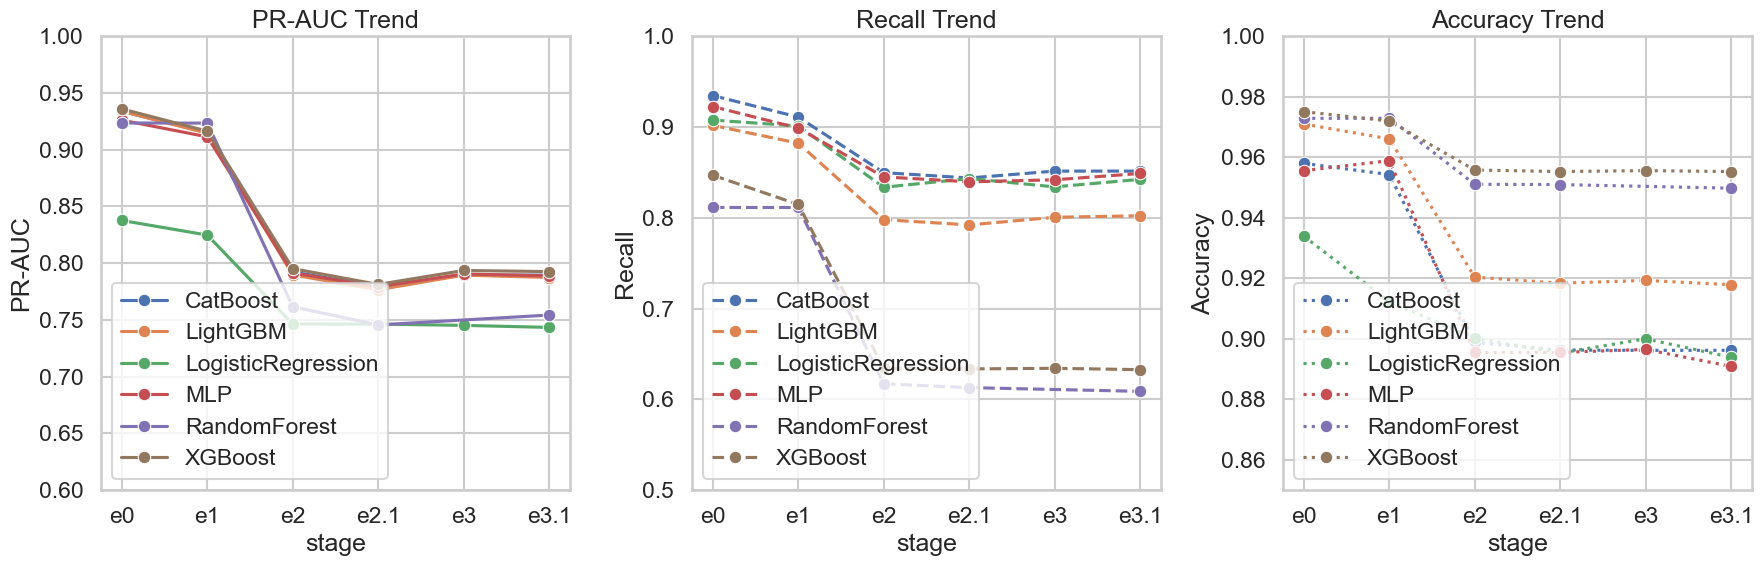

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Plotting PR-AUC, Recall, Accuracy
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# PR-AUC
sns.lineplot(data=metrics_df, x='stage', y='pr_auc', hue='model', marker='o', ax=axes[0])
axes[0].set_ylim(0.6, 1.0)
axes[0].set_title('PR-AUC Trend')
axes[0].set_ylabel('PR-AUC')
axes[0].legend(loc='lower left')

# Recall
sns.lineplot(data=metrics_df, x='stage', y='recall', hue='model', marker='o', linestyle='--', ax=axes[1])
axes[1].set_ylim(0.5, 1.0)
axes[1].set_title('Recall Trend')
axes[1].set_ylabel('Recall')
axes[1].legend(loc='lower left')

# Accuracy
sns.lineplot(data=metrics_df, x='stage', y='accuracy', hue='model', marker='o', linestyle=':', ax=axes[2])
axes[2].set_ylim(0.85, 1.0)
axes[2].set_title('Accuracy Trend')
axes[2].set_ylabel('Accuracy')
axes[2].legend(loc='lower left')

plt.tight_layout()
plt.show()

## 2. Robustness Analysis: Model-wise Average Delta
각 모델별로 e0~e3.1까지의 실험을 통해 지표 변동량(Delta)의 평균을 계산하여 비교합니다.
이 값이 0에 가까울수록(또는 감소폭이 적을수록) 다양한 조건에서 성능이 안정적임을 의미합니다.\n

Model-wise Average Delta calculation complete.


/var/folders/n6/9fr973913k7931ymsg4ly6rc0000gn/T/ipykernel_49078/838588865.py:12: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  delta_df = metrics_df.groupby('model', group_keys=False).apply(calculate_delta)


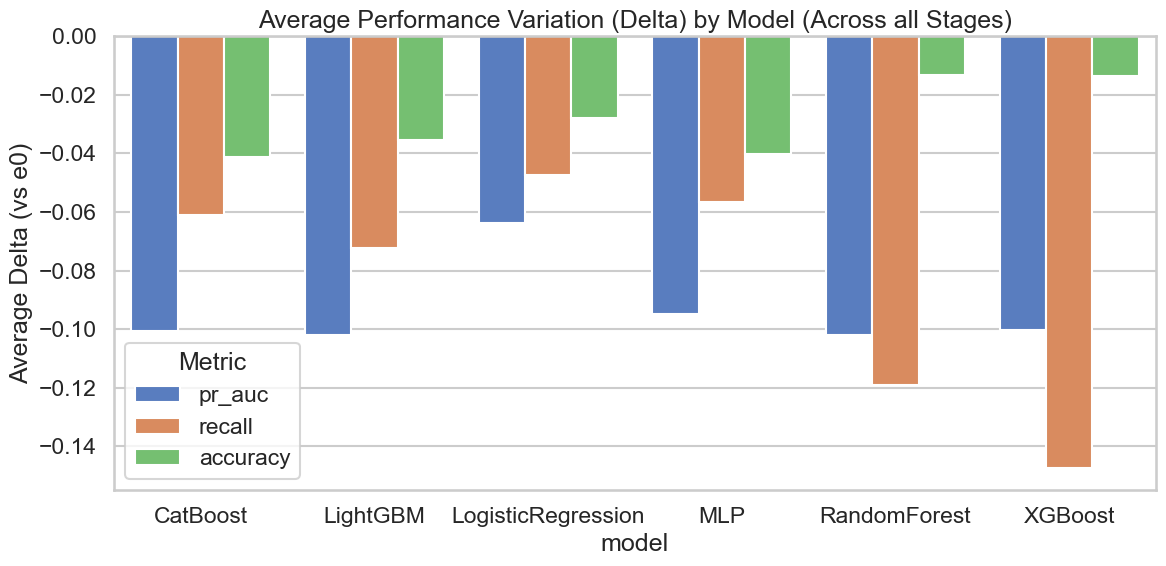

In [32]:
# Calculate Delta relative to e0 for each model
def calculate_delta(group):
    e0_val = group.loc[group['stage'] == 'e0']
    
    if not e0_val.empty:
        for col in ['pr_auc', 'recall', 'accuracy']:
            base = e0_val[col].values[0]
            group[f'delta_{col}'] = group[col] - base
    return group

# Apply calculation
delta_df = metrics_df.groupby('model', group_keys=False).apply(calculate_delta)

# Calculate Average Delta per Model (across all stages)
model_avg_delta_df = delta_df.groupby('model', observed=True)[['delta_pr_auc', 'delta_recall', 'delta_accuracy']].mean().reset_index()

# Melt for plotting
model_avg_delta_long = pd.melt(model_avg_delta_df, id_vars=['model'], 
                         value_vars=['delta_pr_auc', 'delta_recall', 'delta_accuracy'],
                         var_name='metric', value_name='avg_delta')

model_avg_delta_long['metric'] = model_avg_delta_long['metric'].str.replace('delta_', '')

print("Model-wise Average Delta calculation complete.")

# Plot Model-wise Average Delta
plt.figure(figsize=(12, 6))
sns.barplot(data=model_avg_delta_long, x='model', y='avg_delta', hue='metric', palette='muted')
plt.title('Average Performance Variation (Delta) by Model (Across all Stages)')
plt.ylabel('Average Delta (vs e0)')
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()